In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
def mass_replace(df,column,matches_replacements):
  '''
  Replaces every key from matches_replacements dict with the corresponding value

  '''
  if not len(matches_replacements):
    raise ValueError('Length of arguments 0. Please give something to replace')

  if type(matches_replacements) != dict:
    raise TypeError('Matches_replacements must be of type dict')

  types=[list,tuple,dict]
  for key,value in matches_replacements.items():
    if type(key) in types or type(value) in types:
      raise TypeError('''When iterating through keys and values, none of the
      individual keys or values should be an interable''')

    try:
      df[column].replace({key:value},regex=True,inplace=True)

    except:
      print(f'the key, value causing the error are {key},{value}')


In [ ]:
def name_cleaner(string):
  if type(string)!=str:
    return np.nan

  try:
    string=string.lower()
    string= string.split(' ')
    return string[0]
  except:
    print(string)
    return np.nan

In [ ]:
sharks=pd.read_csv('/content/drive/My Drive/shark_attack_data.csv')

In [ ]:
sharks.Name=sharks.Name.apply(name_cleaner)

In [ ]:
name_counts=sharks.Name.value_counts().reset_index().drop([0,1,3,7,12,21,22])
name_counts.rename(columns={'index':'name','Name':'count'},inplace=True)
name_counts=name_counts[name_counts['count']>28]

In [ ]:
activities_series=sharks.Activities_token_strings.value_counts()

In [ ]:
activities_dict={}
for index,value in zip(activities_series.index,activities_series.values):
  if len(index.split(','))==1:
    if activities_dict.get(index,False):
      activities_dict[index]+=value
    else:
      activities_dict[index]=value
  if len(index.split(','))>1:
    for word in index.split(','):
      if activities_dict.get(word,False):
        activities_dict[word]+=value
      else:
        activities_dict[word]=value

In [ ]:
activities_df=pd.Series(activities_dict).sort_values(ascending=False).reset_index()

In [ ]:
activities_df=activities_df[activities_df[0]>8]

In [ ]:
activities_df['index'].iloc[5]='wade'
activities_df['index'].iloc[6]='bathe'
activities_df[0].iloc[5]+=activities_df[0].iloc[7]
activities_df[0].iloc[4]+=activities_df[0].iloc[8]
activities_df[0].iloc[0]+=activities_df[0].iloc[9]
activities_df[0].iloc[12]+=activities_df[0].iloc[10]
activities_df[0].iloc[12]+=activities_df[0].iloc[21]
activities_df.drop([7,8,9,10,21,11,15,18,19,20,22,23,24,27,28,29,30,31,33,34,35,37,38,40,41,43,44,45,46,47,51,52],axis=0,inplace=True)


<ipython-input-11-25d72a8ab005>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activities_df['index'].iloc[6]='bathe'
<ipython-input-11-25d72a8ab005>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activities_df[0].iloc[4]+=activities_df[0].iloc[8]
<ipython-input-11-25d72a8ab005>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activities_df[0].iloc[0]+=activities_df[0].iloc[9]
<ipython-input-11-25d72a8ab005>:6: SettingWithCopyWarni

In [ ]:
activities_df=activities_df.sort_values(by=0,ascending=False).reset_index().drop(['level_0'],axis=1)
activities_df.rename(columns={'index':'Activity',0:'Count'},inplace=True)

activities_df.drop([16,17,18,19,20],inplace=True)

In [ ]:
mass_replace(sharks,'Age',{r'(\d{1,2}) or \d{1,2}':'\g<1>',
        r'(\d{1,2}) to \d{1,2}':'\g<1>',
        r'"?(?i)young"?':np.nan,
        r'"?(?i)adult"?':np.nan,
        r'"?(?i)elderly"?':np.nan,
        r"\d+'?s":np.nan,
        r'(?i)m':np.nan,
        r'(?i)teens?':np.nan,
        r'[1-9]{1,2} and [1-9]{1,2}':'-1',
        r'.* and .*':'-1',
        r'.* & .*':'-1',
        r'>':'',
        r'<':'',
        r'\d      &    \d\d':'-1',
        r' ':'',
        r'\?':''})

In [ ]:
sharks.Age.iloc[6599]=2
sharks.Age.iloc[5775]=2
sharks.Age.iloc[5764]=np.nan
sharks.Age.iloc[5678]=np.nan
sharks.Age.iloc[5655]=np.nan
sharks.Age.iloc[5593]='-1'
sharks.Age.iloc[5394]='-1'
sharks.Age.iloc[5269]=np.nan
sharks.Age.iloc[5180]='-1'
sharks.Age.iloc[4983]=np.nan
sharks.Age.iloc[4803]=1
sharks.Age.iloc[4708]='-1'
sharks.Age.iloc[4668]='-1'
sharks.Age.iloc[4654]=np.nan
sharks.Age.iloc[4642]=np.nan
sharks.Age.iloc[4588]='-1'
sharks.Age.iloc[4576]='-1'
sharks.Age.iloc[4392]=np.nan
sharks.Age.iloc[4236]=np.nan
sharks.Age.iloc[4136]=1
sharks.Age.iloc[4107]='-1'
sharks.Age.iloc[3837]=20
sharks.Age.iloc[3739]=74
sharks.Age.iloc[3740]=45
sharks.Age.iloc[3693]=np.nan
sharks.Age.iloc[3567]=np.nan
sharks.Age.iloc[3550]=np.nan
sharks.Age.iloc[3477]=np.nan
sharks.Age.iloc[3215]=np.nan
sharks.Age.iloc[3216]=np.nan
sharks.Age.iloc[3075]=np.nan
sharks.Age.iloc[2533]=np.nan
sharks.Age.iloc[2479]=6
sharks.Age.iloc[2402]=np.nan
sharks.Age.iloc[2403]=np.nan
sharks.Age.iloc[1023]=1
sharks.Age.iloc[554]=np.nan
sharks.Age.iloc[424]='-1'
sharks.Age.iloc[202]=np.nan
sharks.Age.iloc[198]=6
sharks.Age.iloc[36]=2
sharks.Age.iloc[16]=np.nan



<ipython-input-18-f0e19a9dfe78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks.Age.iloc[6599]=2
<ipython-input-18-f0e19a9dfe78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks.Age.iloc[5775]=2
<ipython-input-18-f0e19a9dfe78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks.Age.iloc[5764]=np.nan
<ipython-input-18-f0e19a9dfe78>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [ ]:
sharks.Fatality.value_counts()

No        4816
Yes       1452
Unsure     636
2017         1
Name: Fatality, dtype: int64

In [ ]:
sharks.Age=sharks.Age.astype(float)


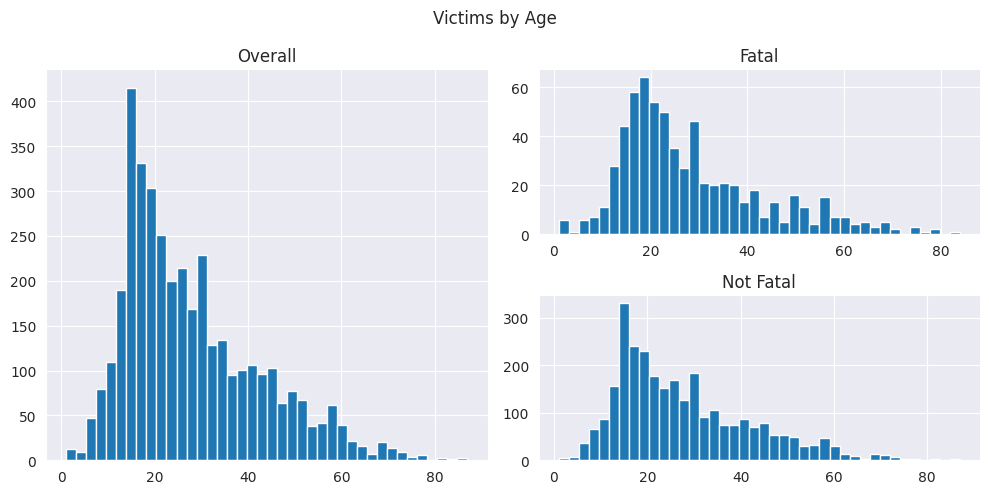

In [ ]:
with sns.axes_style('darkgrid'):
  fig=plt.figure(figsize=(10,5))
  plt.suptitle('Victims by Age')
  ax1=plt.subplot2grid((6,6),(0,0),colspan=3,rowspan=6)
  ax1.hist(x=sharks.Age[sharks.Age>-1],bins=40)
  ax1.set_title('Overall')
  ax2=plt.subplot2grid((6,6), (0,3),colspan=3,rowspan=3)
  ax2.hist(x=sharks.Age[(sharks.Age>-1)&(sharks.Fatality=='Yes')],bins=40)
  ax2.set_title('Fatal')
  ax3=plt.subplot2grid((6,6), (3,3),colspan=3,rowspan=3)
  ax3.hist(x=sharks.Age[(sharks.Age>-1)&(sharks.Fatality=='No')],bins=40)
  ax3.set_title('Not Fatal')
  fig.tight_layout()
  plt.ylabel('')
  plt.xlabel('')

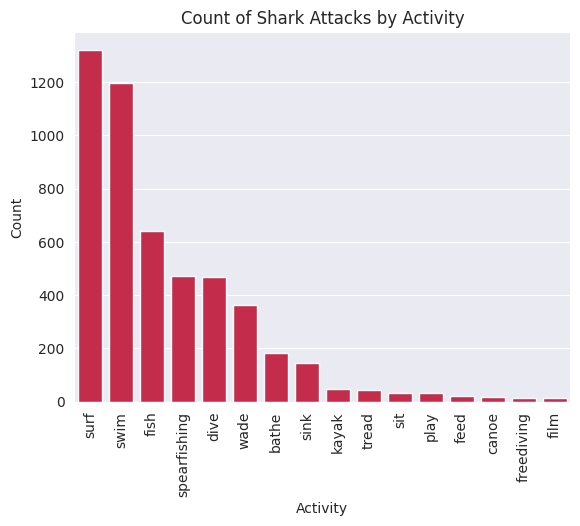

In [ ]:
with sns.axes_style('darkgrid'):
  sns.barplot(activities_df,x='Activity',y='Count',color='crimson')
  plt.xticks(rotation=90)
  plt.title('Count of Shark Attacks by Activity')

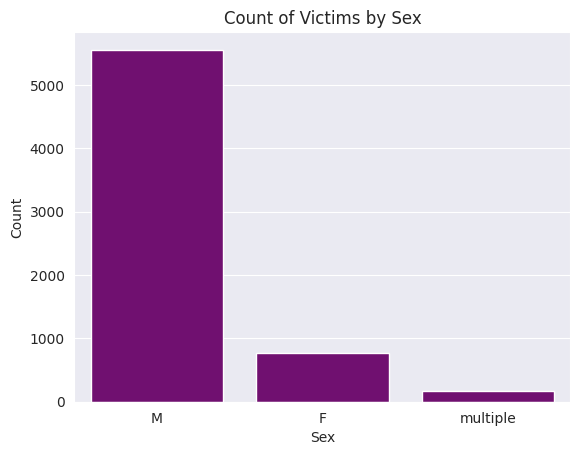

In [ ]:
with sns.axes_style('darkgrid'):
  sns.barplot(data=sharks,x=sharks.Sex.value_counts().index,y=sharks.Sex.value_counts().values,color='purple')
  plt.title('Count of Victims by Sex')
  plt.xlabel('Sex')
  plt.ylabel('Count')

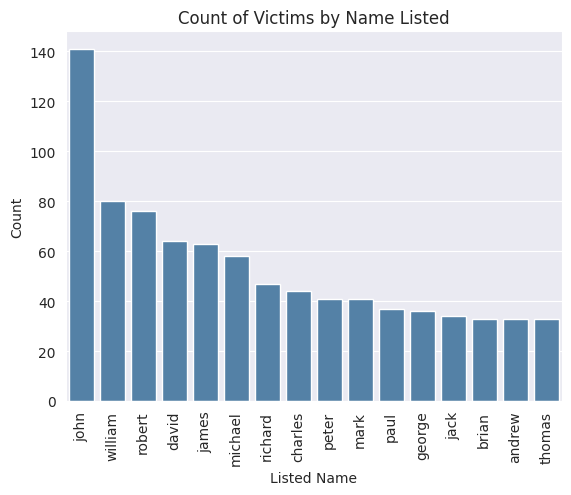

In [ ]:
with sns.axes_style('darkgrid'):
  sns.barplot(data=name_counts,x='name',y='count',color='steelblue')
  plt.title('Count of Victims by Name Listed')
  plt.xlabel('Listed Name')
  plt.ylabel('Count')
  plt.xticks(rotation=90)